In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from n2n4m.crism_image import CRISMImage
from n2n4m.plot import Visualiser
from n2n4m.preprocessing import load_dataset
from n2n4m.utils import label_list_to_string, convert_coordinates_to_xy
from hm4.preprocessing import imagewise_train_test_split

In [ ]:
pixel_data_filepath = # Insert path to the mineral_pixel_dataset.json file producted by mineral_data_collation.py here
pixel_data = load_dataset(pixel_data_filepath)
pixel_data

,Coordinates,Pixel_Class,Image_Name,Spectrum
0,"[295, 36]",[9],0AD3D,"[65535.0, 65535.0, 0.2332303077, 0.2353618443,..."
1,"[296, 36]",[9],0AD3D,"[65535.0, 65535.0, 0.2311850786, 0.2348753214,..."
2,"[299, 36]",[9],0AD3D,"[65535.0, 65535.0, 0.2221794873, 0.22349554300..."
3,"[300, 36]",[9],0AD3D,"[65535.0, 65535.0, 0.2221541405, 0.22205969690..."
4,"[299, 37]",[9],0AD3D,"[65535.0, 65535.0, 0.22547394040000002, 0.2262..."
...,...,...,...,...
586594,"[630, 178]",[18],21D02,"[65535.0, 65535.0, 0.22979713980000002, 0.2260..."
586595,"[621, 179]",[18],21D02,"[65535.0, 65535.0, 0.2018264383, 0.20013058190..."
586596,"[622, 179]",[18],21D02,"[65535.0, 65535.0, 0.2119837105, 0.2104244381,..."
586597,"[626, 179]",[18],21D02,"[65535.0, 65535.0, 0.2167570442, 0.2155279964,..."


In [3]:
pixel_data = label_list_to_string(pixel_data)
pixel_data = convert_coordinates_to_xy(pixel_data)

In [4]:
image_shortcodes = pixel_data["Image_Name"].unique()
image_shortcodes

<StringArray>
['0AD3D', '03FB9', '07D87', '0B252', '09786', '173F4', '13D1F', '0A546',
 '09971', '0C26C', '12C19', '167FA', '0B8C2', '0CA5C', '19DAA', '098B2',
 '081CF', '21B59', '0CBAC', '0863E', '096BF', '0BAD4', '0987B', '0A09C',
 '0AA7D', '0634B', '05814', '20BF9', '0A91C', '1212A', '09326', '062B6',
 '0285A', '09312', '03BFB', '0A4FC', '13EEF', '097E2', '0B385', '027E2',
 '096FE', '0C467', '19AA0', '20AE1', '0AB81', '0CC44', '093BE', '12E09',
 '0750A', '36F60', '064D9', '02885', '0B868', '0CBE5', '043EC', '13F5B',
 '1187B', '14703', '0AA03', '0A053', '3703F', '0A425', '07E26', '0454E',
 '08565', '137C2', '21C5A', '0B438', '03E12', '050F2', '0A2C2', '19538',
 '02FC5', '08F68', '09036', '0BABA', '21D02']
Length: 77, dtype: string

In [5]:
count = 15

Image loaded successfully.


/scratch_dgxl/rp1818/miniconda3/envs/pixel_classifier/lib/python3.11/site-packages/n2n4m/plot.py:105: UserWarning: Bad values detected in the image. A copy has been made, values > 1000 will be replaced with np.nan.
  warnings.warn(


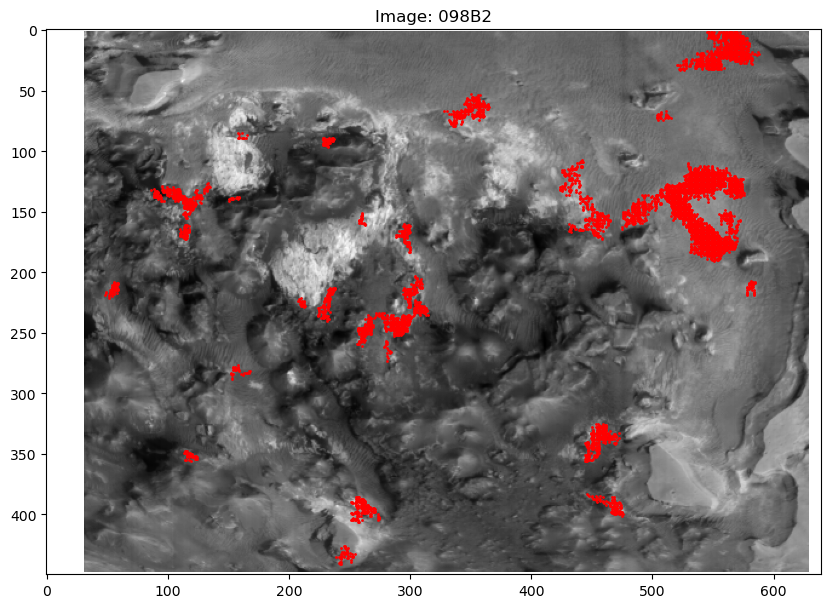

In [ ]:
DATA_DIR = # folder containing all images, each in individual directory

image_folders = os.listdir(DATA_DIR)
for folder in image_folders:
    if folder.endswith(image_shortcodes[count]):
        current_folder = os.path.join(DATA_DIR, folder)
        break

image_file_list = os.listdir(current_folder)
image_file_list = [
    f
    for f in image_file_list
    if (f.endswith("TRR3.img") or f.endswith("trr3.img"))
][0]
image_filepath = os.path.join(current_folder, image_file_list)

image = CRISMImage(image_filepath)
vis = Visualiser(image)
image_pixels = pixel_data[pixel_data["Image_Name"] == image_shortcodes[count]]
image_pixels = image_pixels[["x", "y", "Image_Name", "Pixel_Class"]]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(vis.get_image(60), cmap="gray")
ax.scatter(image_pixels["x"], image_pixels["y"], s=1, c="red")

ax.set_title(f"Image: {image_shortcodes[count]}")
count += 1
plt.show()

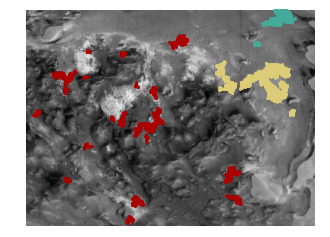

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(vis.get_image(60), cmap="gray")

test_pixels = image_pixels[(image_pixels["x"]>500) & (image_pixels["y"]<100)]
# train is everything else
train_pixels = image_pixels[~((image_pixels["x"]>500) & (image_pixels["y"]<100))]
validation_pixels = train_pixels[(train_pixels["x"]>400) & (train_pixels["y"]<250)]
train_pixels = train_pixels[~((train_pixels["x"]>400) & (train_pixels["y"]<250))]

ax.scatter(test_pixels["x"], test_pixels["y"], s=1, c="#44AA99", label="Test")
ax.scatter(validation_pixels["x"], validation_pixels["y"], s=1, c="#DDCC77", label="Val")
ax.scatter(train_pixels["x"], train_pixels["y"], s=1, c="#aa0000ff", label="Train")

ax.set_axis_off()